In [5]:
from google.colab import drive
drive.mount('/content/drive')

%cd drive/My Drive

Mounted at /content/drive
/content/drive/My Drive


In [6]:
%cd Data/Titanic

/content/drive/My Drive/Data/Titanic


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn') #같은 그림이라도 되게 다양한 스타일로 형성 !
sns.set(font_scale= 2.5) #통일된 그림! -> 모든 폰트의 사이즈는 2.5

import missingno as msno #데이터셋의 채워지지 않은 null 데이터를 쉽게 보여주는 라이브러리

#igonore warnings
import warnings
warnings.filterwarnings('ignore')
 
# %matplotlib inline #새 창 뜨지말고 노트북 안에서 보여줘!

In [115]:
#데이터 불러오기
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [ ]:
#앞 쪽 부분 데이터 읽어오기
df_train.head(10) #생각해보니 pandas 진짜 R이랑 비슷하다

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df_train.describe() #간단한 통계적 수치 
#PassengerId랑 Age의 수가 맞지 않음 = null data in Age

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_train.max()

PassengerId                            891
Survived                                 1
Pclass                                   3
Name           van Melkebeke, Mr. Philemon
Sex                                   male
Age                                     80
SibSp                                    8
Parch                                    6
Ticket                           WE/P 5735
Fare                               512.329
dtype: object

In [ ]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
df_train.shape #np 배열 -> 로우 891개 컬럼 12개

(891, 12)

In [ ]:
#null 데이터 확인

for col in df_train.columns:
  msg = 'column: {:>10} \t Percent of NaN value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
  print(msg)

column: PassengerId 	 Percent of NaN value: 0.00%
column:   Survived 	 Percent of NaN value: 0.00%
column:     Pclass 	 Percent of NaN value: 0.00%
column:       Name 	 Percent of NaN value: 0.00%
column:        Sex 	 Percent of NaN value: 0.00%
column:        Age 	 Percent of NaN value: 19.87%
column:      SibSp 	 Percent of NaN value: 0.00%
column:      Parch 	 Percent of NaN value: 0.00%
column:     Ticket 	 Percent of NaN value: 0.00%
column:       Fare 	 Percent of NaN value: 0.00%
column:      Cabin 	 Percent of NaN value: 77.10%
column:   Embarked 	 Percent of NaN value: 0.22%


In [ ]:
#null 데이터 확인

for col in df_test.columns:
  msg = 'column: {:>10} \t Percent of NaN value: {:.2f}%'.format(col, 100*(df_test[col].isnull().sum()/df_test[col].shape[0]))
  print(msg)

column: PassengerId 	 Percent of NaN value: 0.00%
column:     Pclass 	 Percent of NaN value: 0.00%
column:       Name 	 Percent of NaN value: 0.00%
column:        Sex 	 Percent of NaN value: 0.00%
column:        Age 	 Percent of NaN value: 20.57%
column:      SibSp 	 Percent of NaN value: 0.00%
column:      Parch 	 Percent of NaN value: 0.00%
column:     Ticket 	 Percent of NaN value: 0.00%
column:       Fare 	 Percent of NaN value: 0.24%
column:      Cabin 	 Percent of NaN value: 78.23%
column:   Embarked 	 Percent of NaN value: 0.00%


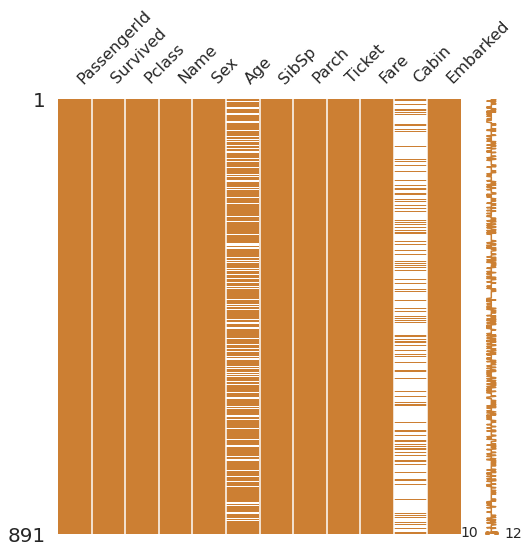

In [ ]:
msno.matrix(df = df_train.iloc[:,:], figsize = (8,8), color = (0.8, 0.5, 0.2))

#iloc = index location (행, 열 전부다 !)
#figsize = 그래프 크기
# 색 조절 RGB 조정

#이건 null 데이터 위치!

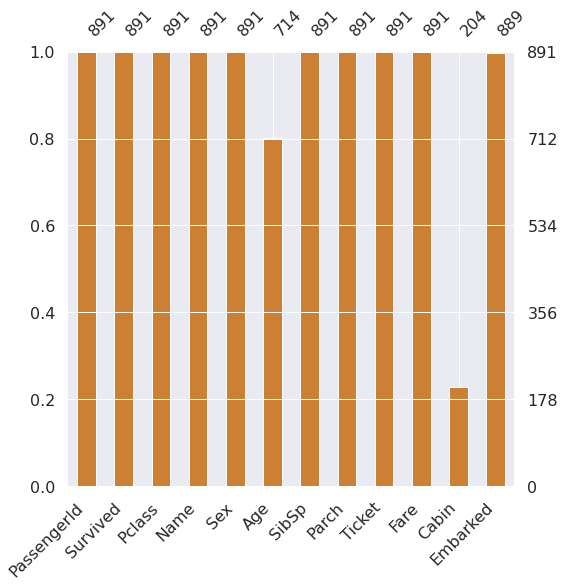

In [ ]:
msno.bar(df = df_train.iloc[:,:], figsize = (8,8), color = (0.8, 0.5, 0.2))

#이건 null 데이터를 제외한 값들의 수!

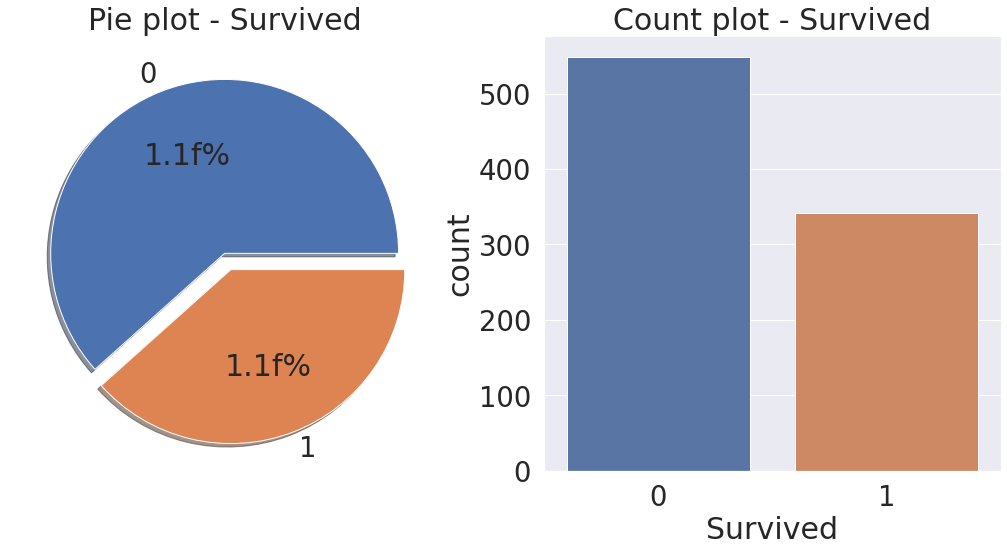

In [ ]:
#Target Lable이 무엇이냐에 따라 모델의 생성 방향이 달라짐!

f, ax = plt.subplots(1, 2, figsize = (18,8)) #sub -> 도화지를 그리자
# 1 하나의 행에 2 두 개의 그림을 그리자
# 행 길이 18 열 길이 8

df_train['Survived'].value_counts().plot.pie(explode = [0,0.1], autopct='1.1f%%', ax = ax[0], shadow = True)
# value 는 각각의 수를 카운트 -> 전부 다 시리즈 = plot을 가짐
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel("")
sns.countplot("Survived", data = df_train, ax = ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

# 2.1 Pclass

In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).count()

#filter 할 때 꼭 리스트 안에 넣어주기!
#as_index -> Pclass를 index로 두느냐? (groupby)

,Survived
Pclass,
1,216
2,184
3,491


In [ ]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True)

#margin은 all

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [ ]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True).style.background_gradient(cmap='summer')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


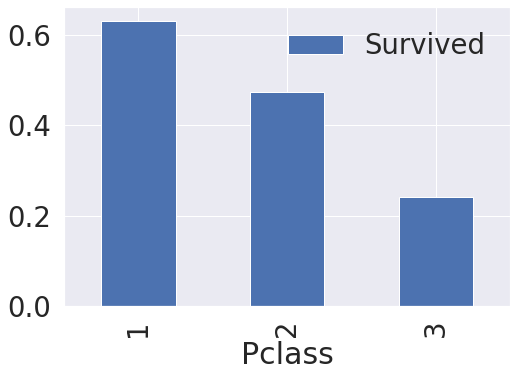

In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).mean().sort_values(by='Survived', ascending=False).plot.bar()

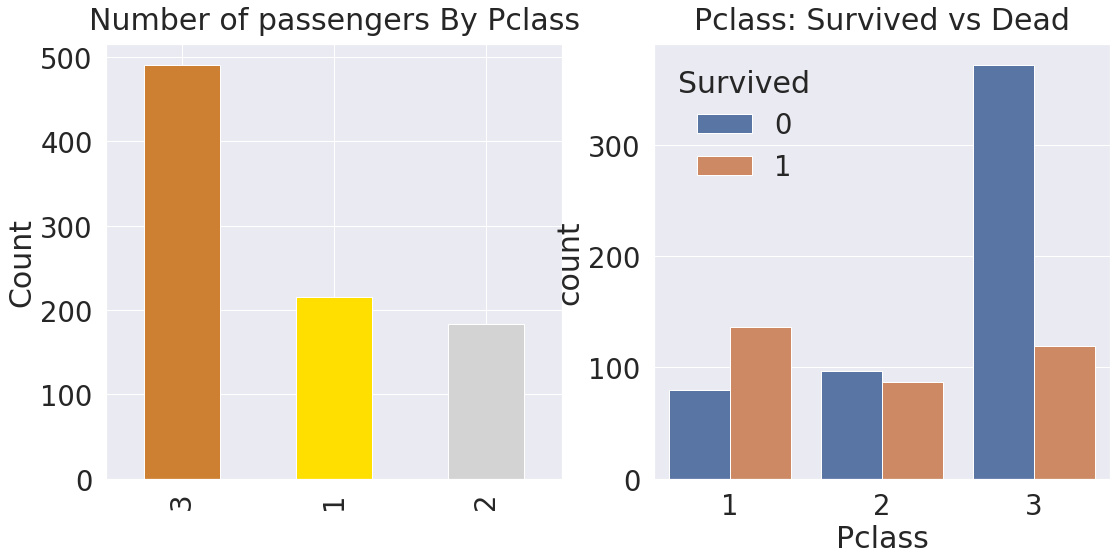

In [ ]:
y_position = 1.02
f, ax = plt.subplots(1,2, figsize = (18,8))
df_train['Pclass'].value_counts().plot.bar(color = ['#CD7F32', '#FFDF00', '#D3D3D3'], ax= ax[0])
ax[0].set_title('Number of passengers By Pclass', y = y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data = df_train, ax = ax[1])  
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

# 2.2 Sex

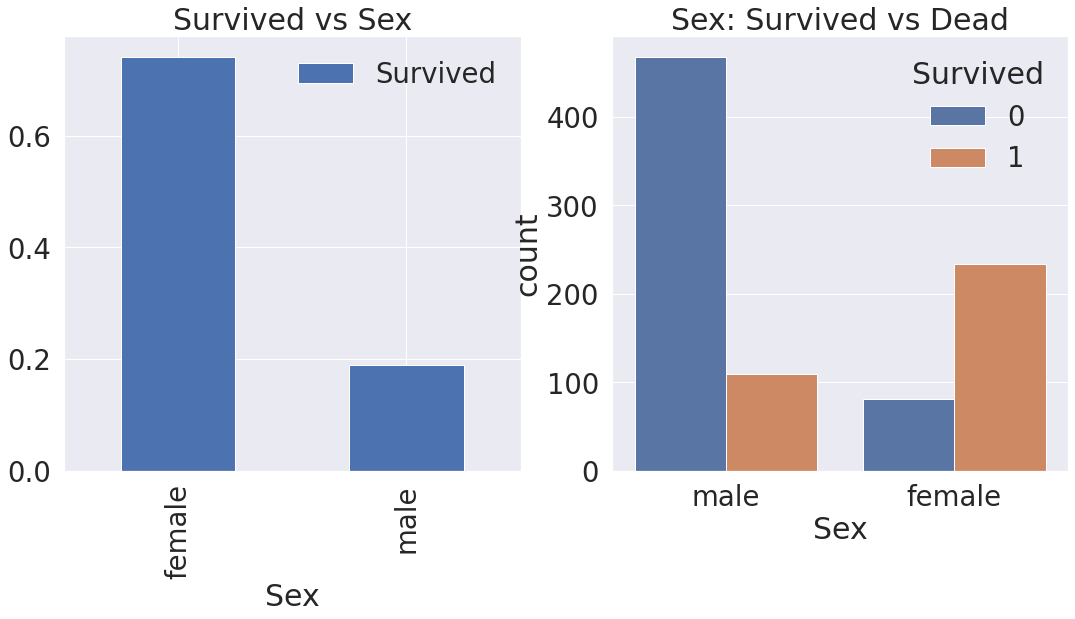

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (18,8)) #sub -> 도화지를 그리자
# 1 하나의 행에 2 두 개의 그림을 그리자
# 행 길이 18 열 길이 8

df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data = df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [ ]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


# 2.2 Both Sex and Pclass

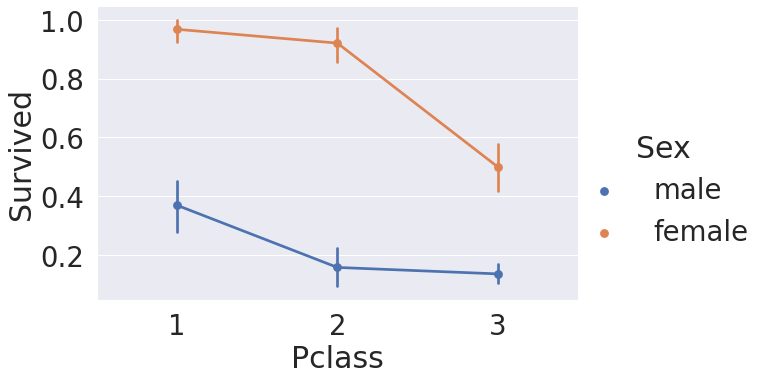

In [ ]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data=df_train, size=6, aspect=1.5)

- Lady first
- Money brings survival

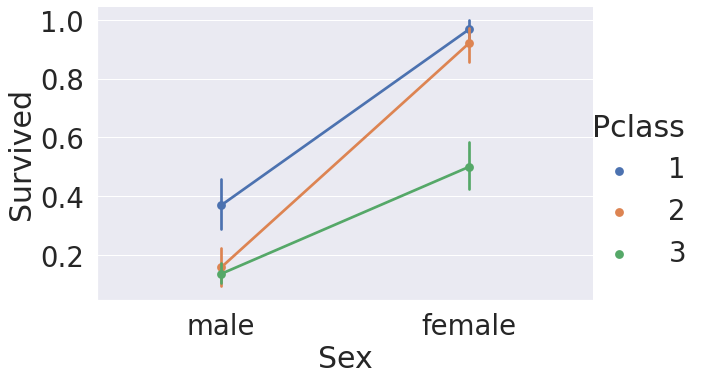

In [ ]:
sns.factorplot(x='Sex', y='Survived', hue = 'Pclass', data=df_train, size=6, aspect=1.5)

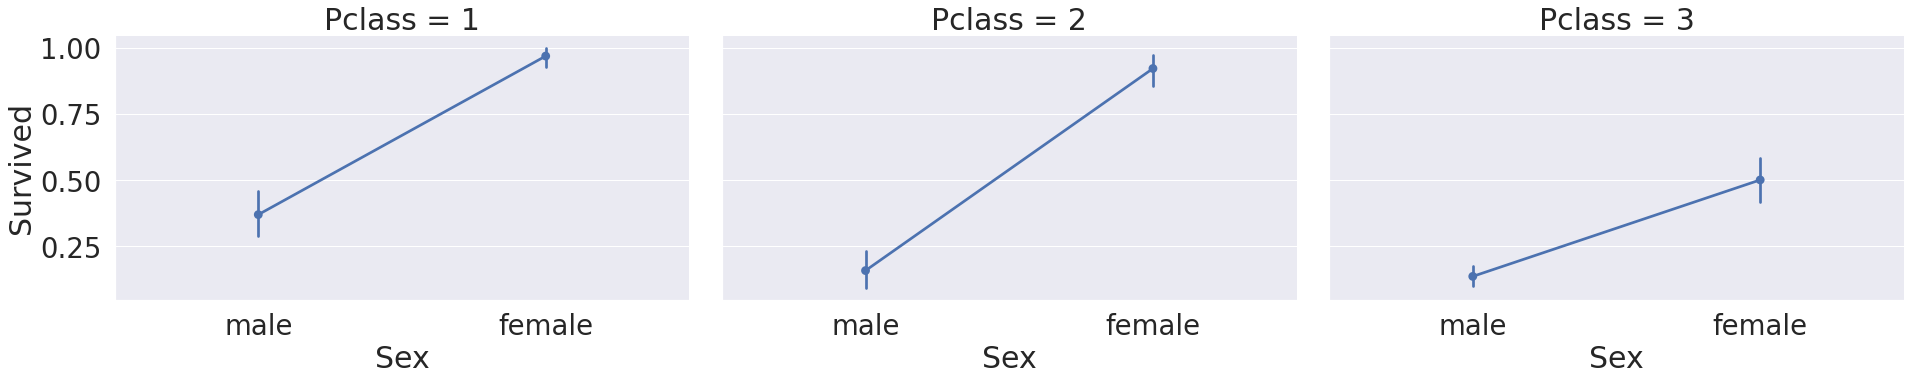

In [ ]:
sns.factorplot(x='Sex', y='Survived', col = 'Pclass', data=df_train, size=6, aspect=1.5)

작대기는 에러바 ! -> 크면 신뢰도가 낮다!

# 2.3. Age

In [ ]:
print('제일 나이 많은 탑승객: {:.1f} years'.format(df_train['Age'].max()))
print('제일 어린 탑승객: {:.1f} years'.format(df_train['Age'].min()))
print('탑승객 나이 평균: {:.1f} years'.format(df_train['Age'].mean()))


제일 나이 많은 탑승객: 80.0 years
제일 어린 탑승객: 0.4 years
탑승객 나이 평균: 29.7 years


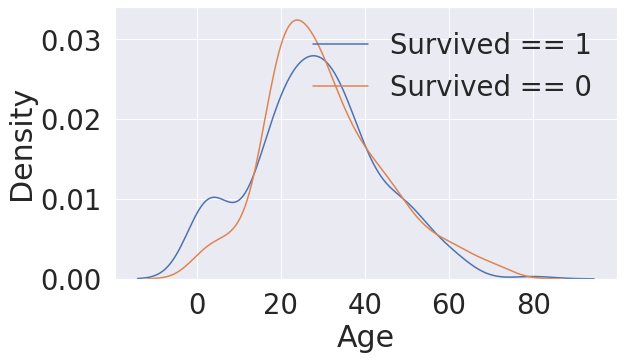

In [ ]:
fig, ax = plt.subplots(1,1,figsize = (9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax = ax)
sns.kdeplot(df_train[df_train['Survived'] == 0 ]['Age'], ax = ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()
#커널밀도추정 Kernel Density Estimate


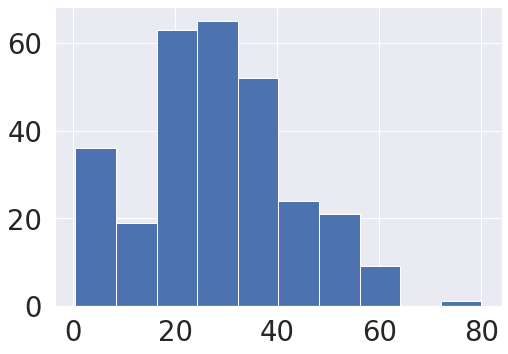

In [ ]:
df_train[df_train['Survived'] == 1]['Age'].hist()

In [ ]:
#도화지를 준비하는 세 가지 방법

f = plt.figure(figsize = (10, 10))
#ax를 가지지 않은 채 도화지만 펴는 작업

f, ax = plt.subplots(1,1,figsize = (10,10))
#축을 반환해줌 -> ax.plot(b)

plt.figure(figsize=(10,10))

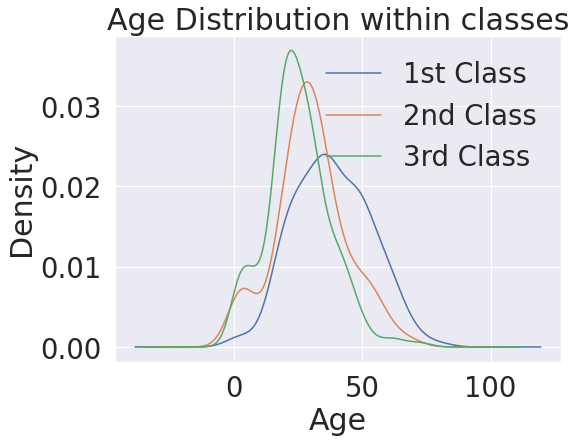

In [ ]:
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind = 'kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

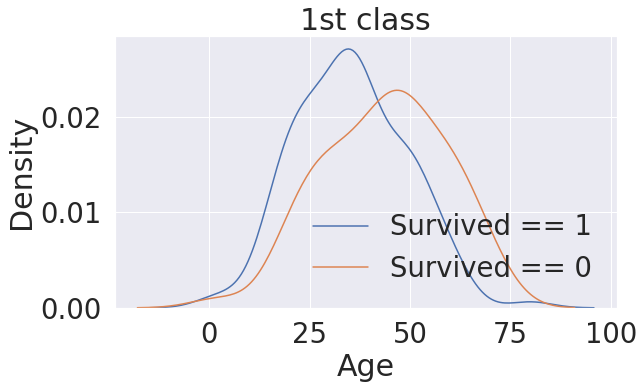

In [ ]:
 fig, ax = plt.subplots(1,1,figsize = (9,5))
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 1)]['Age'], ax = ax)
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 1)]['Age'], ax = ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.title('1st class')
plt.show()

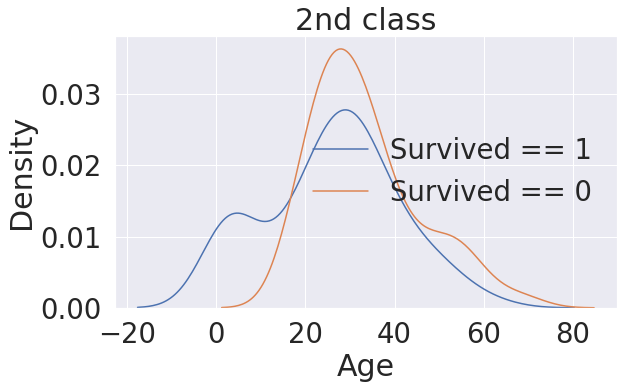

In [ ]:
 fig, ax = plt.subplots(1,1,figsize = (9,5))
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 2)]['Age'], ax = ax)
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 2)]['Age'], ax = ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.title('2nd class')
plt.show()

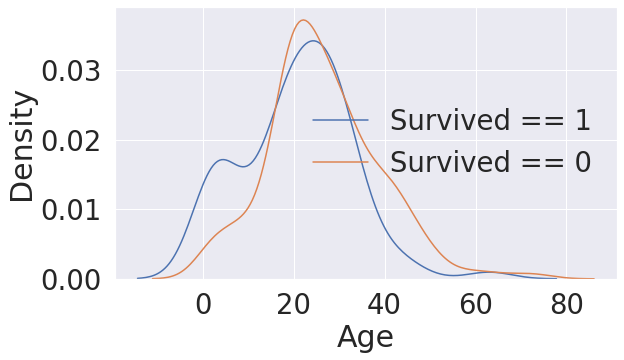

In [ ]:
 fig, ax = plt.subplots(1,1,figsize = (9,5))
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 3)]['Age'], ax = ax)
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 3)]['Age'], ax = ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.title('3rd class')
plt.show()

Text(0.5, 0, 'Range of Age(0~x)')

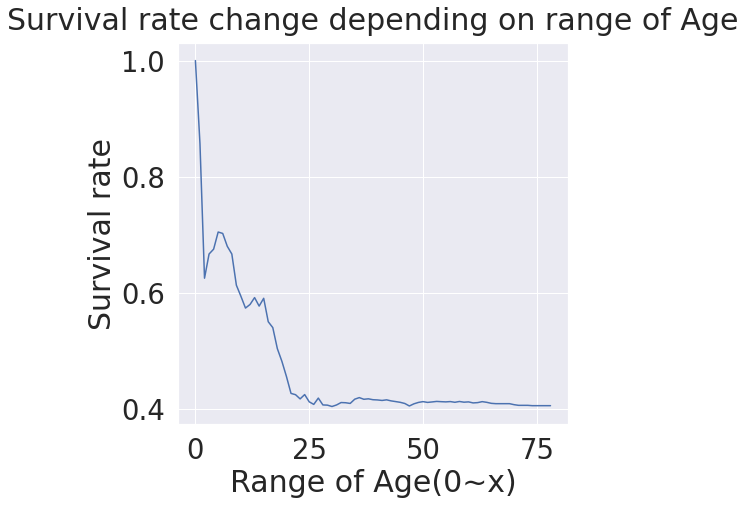

In [ ]:
#나이의 비율에 따른 생존율

change_age_range_survival_ratio = []

for i in range(1, 80):
  change_age_range_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(change_age_range_survival_ratio)
plt.title('Survival rate change depending on range of Age', y = 1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')

## Pclass, Sex, Age -> 3가지를 한 번에 볼 수 있는 plot

# = Violingplot!


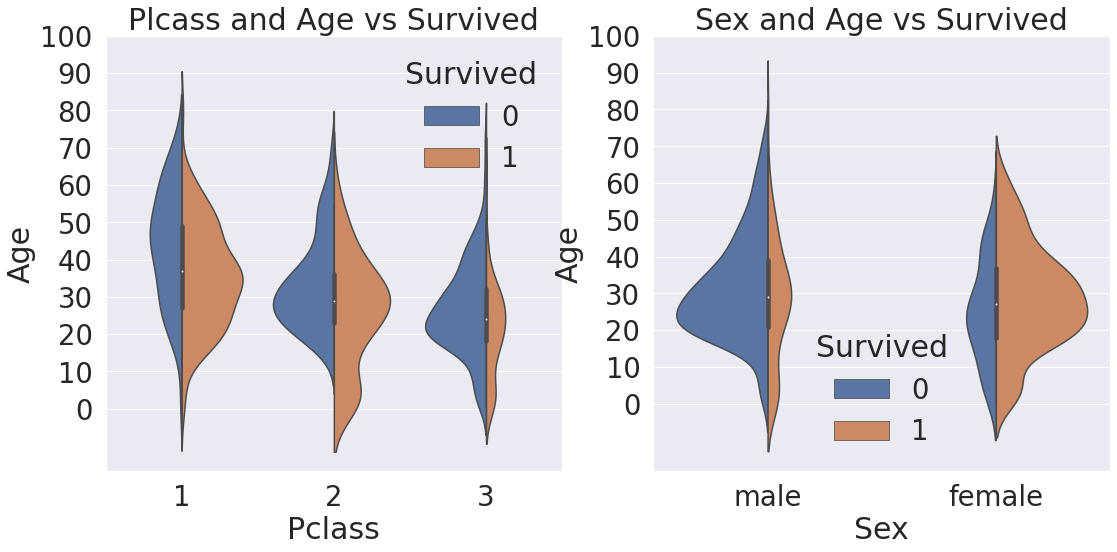

In [ ]:
f, ax = plt.subplots(1,2,figsize = (18,8))

sns.violinplot('Pclass', 'Age', hue = 'Survived', data = df_train, scale='count', split = True, ax = ax[0])
ax[0].set_title('Plcass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue = 'Survived', data = df_train, scale= 'count', split = True, ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

#sclae -> seaborn parameter 알아보기
#scale = count: 숫자의 개념이 좀 더 들어감 !!! (센다)
#area는 distribution을 보기 편함!~

# 2.4 Embarked

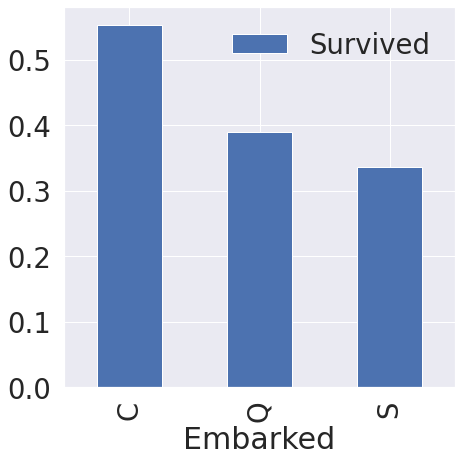

In [ ]:
f, ax = plt.subplots(1,1, figsize = (7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending = False).plot.bar(ax=ax)

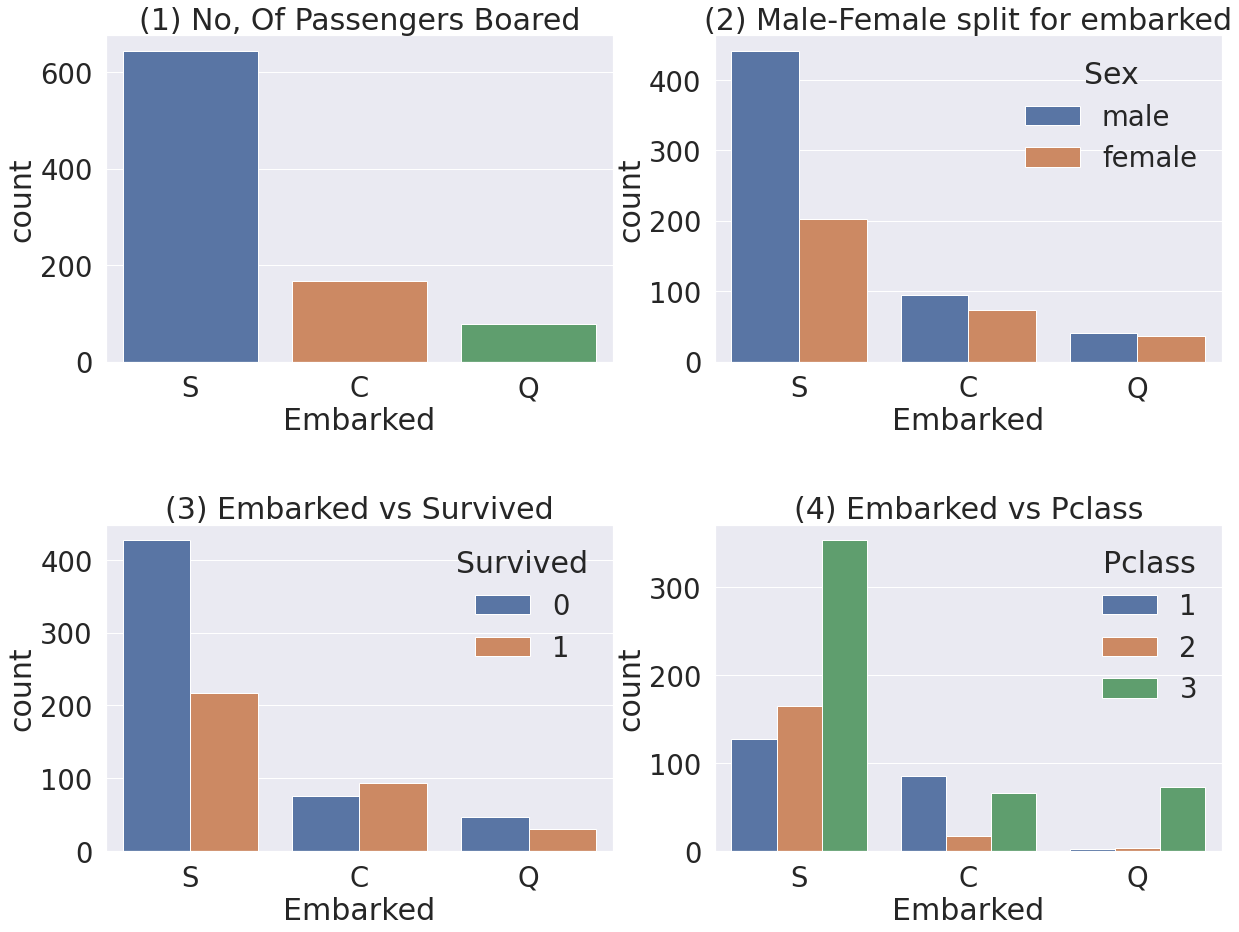

In [ ]:
f, ax = plt.subplots(2,2,figsize = (20,15))
sns.countplot('Embarked', data = df_train, ax = ax[0,0])
ax[0,0].set_title('(1) No, Of Passengers Boared')

sns.countplot('Embarked', hue = 'Sex', data = df_train, ax = ax[0,1])
ax[0,1].set_title('(2) Male-Female split for embarked')

sns.countplot('Embarked', hue = 'Survived', data = df_train, ax = ax[1,0])
ax[1,0].set_title("(3) Embarked vs Survived" )

sns.countplot('Embarked', hue = 'Pclass', data = df_train, ax = ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust (wspace=0.2, hspace=0.5)
plt.show()

#c항구에는 1st class가 많고 여성이 많기 때문에 생존확률이 더 높게 나온다!

# 2.5 Family - sibsp + parch

In [141]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1

#자신까지 포함해야 하므로 +1
#판다스 시리즈는 더하고 뺄 수 있당

In [142]:
print('Maximum size of Family: ', df_train['FamilySize'].max())
print('Minimum size of Family: ', df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


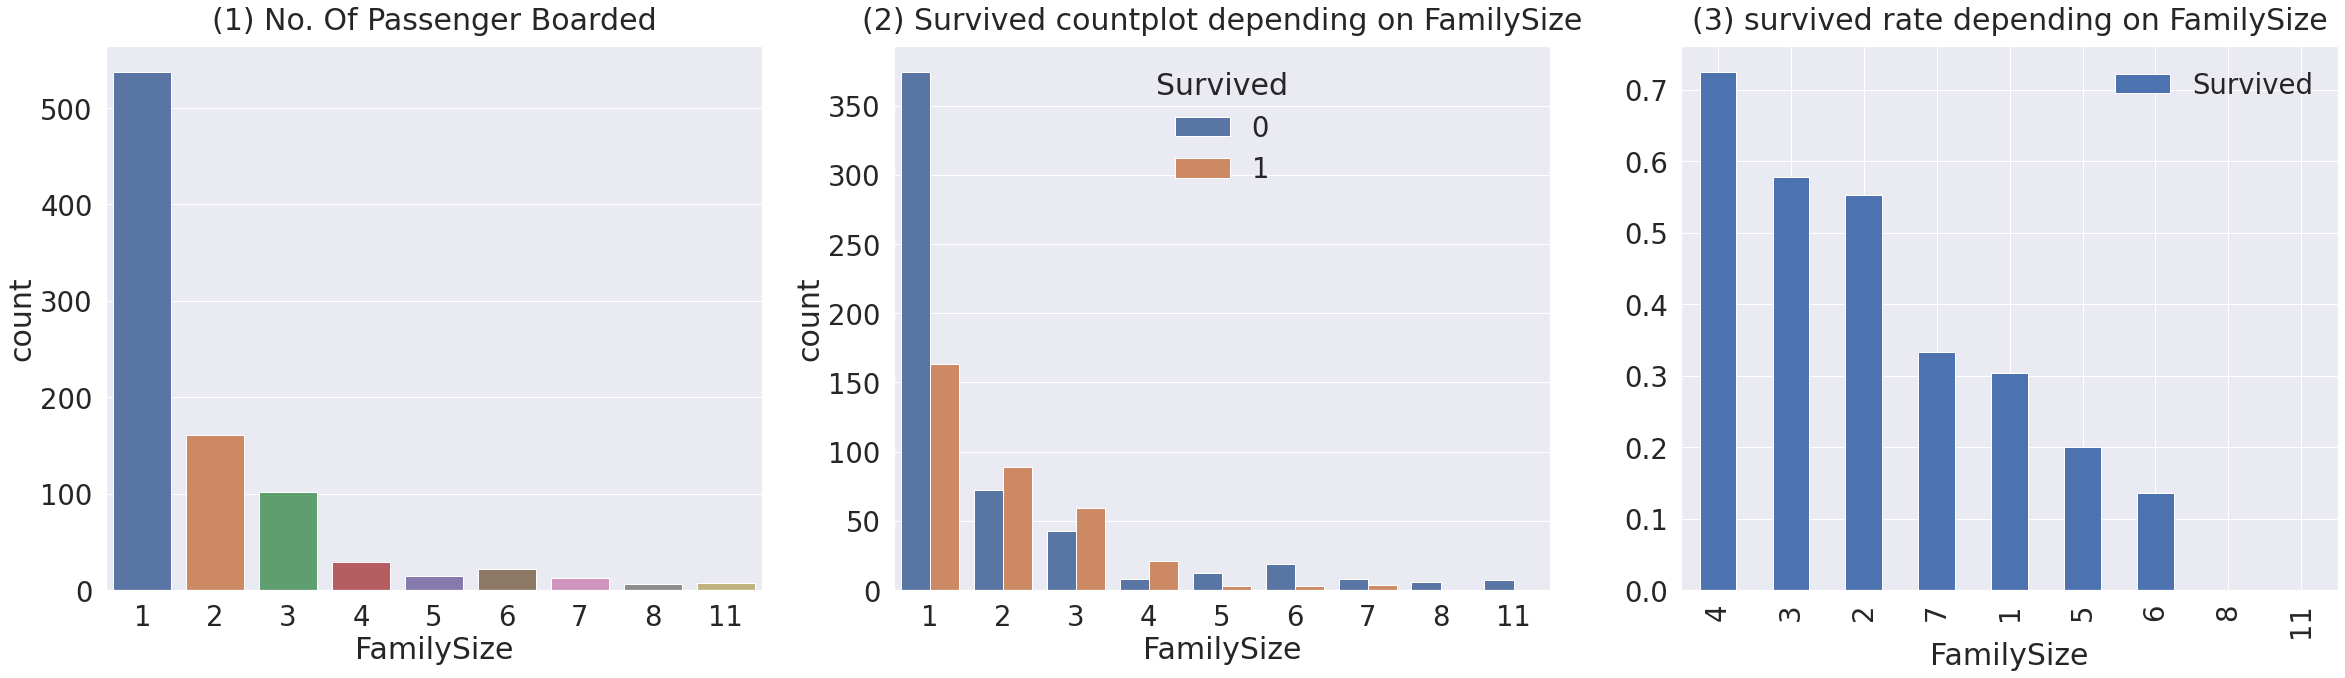

In [143]:
f, ax = plt.subplots(1,3, figsize =  (40,10))
sns.countplot('FamilySize', data = df_train, ax = ax[0])
ax[0].set_title('(1) No. Of Passenger Boarded', y = 1.02)

sns.countplot('FamilySize', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y = 1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = True).mean().sort_values(by = 'Survived', ascending = False).plot.bar(ax = ax[2])
ax[2].set_title('(3) survived rate depending on FamilySize', y = 1.02)

plt.subplots_adjust (wspace= 0.2, hspace= 0.5)
plt.show()

#여러 명 타면 안 좋고 4명 ~ 1명이 적당 !

# 2.6 Fare

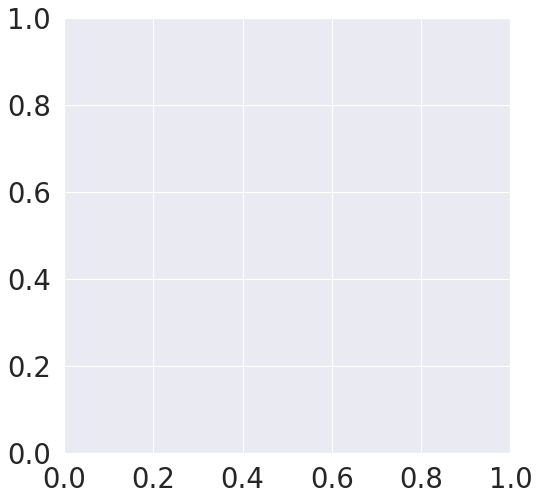

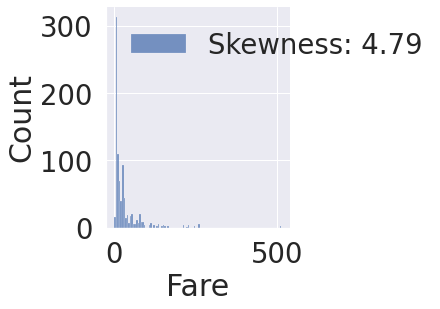

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
g = sns.displot(df_train['Fare'], color = 'b', label = 'Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax = ax)
#왜도 = 얼마나 쏠렸냐?
plt.legend(loc = 'best')

#skew 공부하기!
#왜 이러지?

# 2.7 Ticket

In [ ]:
df_train['Ticket'].value_counts()

CA. 2343     7
347082       7
1601         7
CA 2144      6
3101295      6
            ..
29011        1
A/5 21172    1
244270       1
349228       1
349245       1
Name: Ticket, Length: 681, dtype: int64

# 3. Fill Null in Age 
-> Null 데이터를 어떻게 채우느냐에 따라 모델의 성능이 달라짐!

In [116]:
df_train['Age'].isnull().sum()

#이름의 Mr, Mrs, Ms -> 통계적 수치 활용

177

In [117]:
df_train['Initial'] = df_train['Name'].str.extract('([A-Za-z]*)\.') #모든 값들이 string으로 바뀜
df_test['Initial'] = df_test['Name'].str.extract('([A-Za-z]*)\.')

#A-Z, a-z까지 .가 붙은 거를 extract하겠다!
#정규표현식 공부하기

In [118]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [119]:
df_train['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Col', 'Jonkheer', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'], 
                            ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr'], inplace = True)
#inplace는 새로운 변수 정의 없이 바로 적용 해줌
df_test['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Col', 'Jonkheer', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'], 
                            ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr'], inplace = True)

In [120]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Initial,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,43.937188
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,24.939822
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,45.420603
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,19.102778


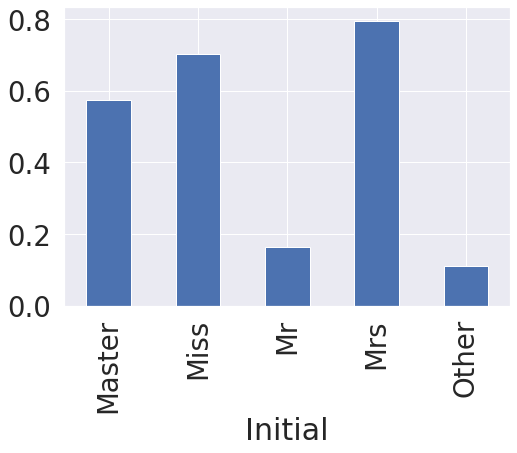

In [121]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [122]:
df_all = pd.concat([df_train, df_test])
df_all.reset_index(drop = True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Mr
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


In [123]:
df_all.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Initial,,,,,,,
Master,658.852459,0.575000,2.655738,5.482642,2.049180,1.377049,36.008195
Miss,616.992453,0.704301,2.332075,21.834533,0.652830,0.494340,42.667628
Mr,658.831388,0.162571,2.359274,32.556397,0.286641,0.159533,25.316303
Mrs,685.673367,0.795276,1.929648,37.034884,0.658291,0.824121,50.686244
Other,714.923077,0.111111,1.615385,44.923077,0.230769,0.153846,35.919231


In [124]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mr'), 'Age'] = 33
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mrs'), 'Age'] = 37
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Master'), 'Age'] = 5
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Miss'), 'Age'] = 22
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Other'), 'Age'] = 45

df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Mr'), 'Age'] = 33
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Mrs'), 'Age'] = 37
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Master'), 'Age'] = 5
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Miss'), 'Age'] = 22
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Other'), 'Age'] = 45




#ㄹㅇ 식겁쳤다 와 Mr 나이 전부 다 33세로 바꿔버렸다 
#원래 데이터 불러와서 겨우 복구함
# 덕분에 이 문법은 안 까먹을듯



# 3.1. Embarked Feature

In [125]:
df_train['Embarked'].isnull().sum()

2

In [126]:
df_train.shape

(891, 13)

In [127]:
#2개의 경우에는 가장 많은 데이터로 하는 게 좋음! -> pandas에 이런 method 있당!

df_train['Embarked'].fillna('S', inplace = True)

# 3.2. Feature engineering Age

In [128]:
df_train['Age_cat'] = 0

In [129]:
#loc로 categorize 할 수 있음 (??)

df_train.loc[df_train['Age']<10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] =1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] =2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] =3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] =4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] =5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] =6
df_train.loc[(70 <= df_train['Age']), 'Age_cat'] =7

In [130]:
df_test.loc[df_test['Age']<10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] =1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] =2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] =3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] =4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] =5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] =6
df_test.loc[(70 <= df_test['Age']), 'Age_cat'] =7

In [131]:
#apply로 쉽게 할 수 있음!

def category_age(x):
  if x < 10:
    return 0
  elif x < 20:
    return 1
  elif x< 30:
    return 2
  elif x<40:
    return 3
  elif x < 50:
    return 4
  elif x< 60:
    return 5
  elif x<70:
    return 6
  else:
    return 7

In [132]:
df_train['Age_cat_2'] = df_train['Age'].apply(category_age) #apply 안에 함수를 넣어줌

In [133]:
(df_train['Age_cat'] == df_train['Age_cat_2']).all()

#전체가 같으면 True

True

In [134]:
df_train.drop(['Age', 'Age_cat_2'], axis=1, inplace = True)
df_test.drop(['Age'], axis =1, inplace= True)

#axis=1로 해주면 세로로 삭제됨

# 3.3. Feature Engineering Change string to categorical and Pearson codfficient

In [135]:
#string을 그대로 넣으면 모델이 학습하기 어려움 -> 숫자로 바꿔줘야 함

df_train.Initial.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [136]:
df_train.Initial = df_train['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})
df_test.Initial = df_test['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})

In [137]:
df_train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [138]:
df_train.Embarked = df_train.Embarked.map({'C':0, 'Q':1, 'S':2})
df_test.Embarked = df_test.Embarked.map({'C':0, 'Q':1, 'S':2})

In [139]:
df_train.Sex = df_train.Sex.map({'female':0, 'male':1})
df_test.Sex = df_test.Sex.map({'female':0, 'male':1})

In [145]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]

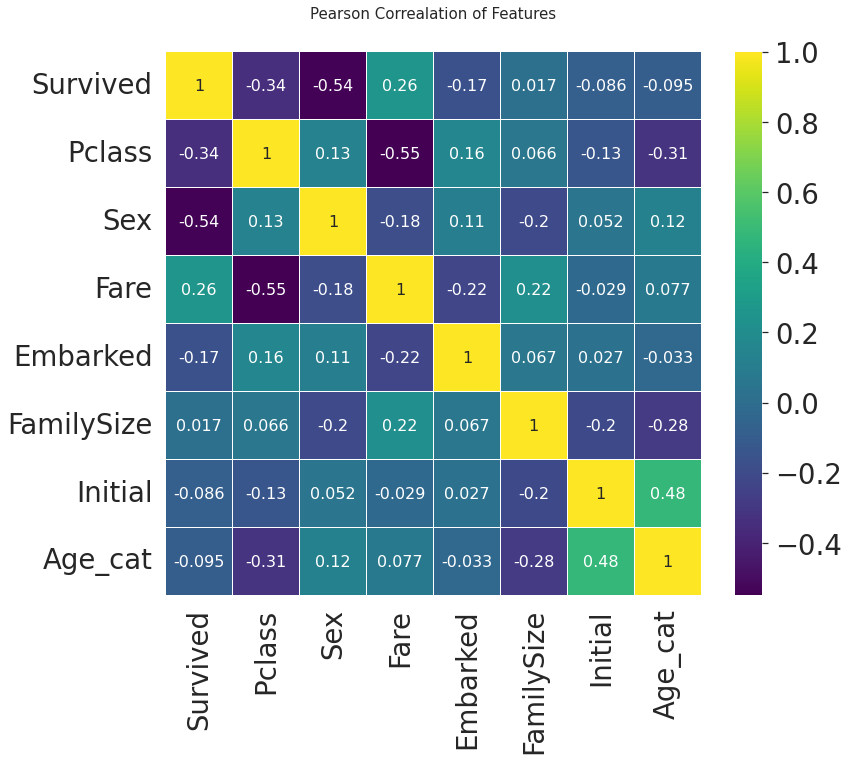

In [146]:
colormap = plt.cm.viridis
plt.figure(figsize = (12,10))
plt.title('Pearson Correalation of Features', y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax =1,
            square = False, cmap = colormap, linecolor = 'white', annot= True, annot_kws={'size':16})

# 3.4 Feature Engineering*** One-hot*** encoding on the Initial and Embarked




In [148]:
#수치화시킨 카테고리 데이터를 모델의 성능을 높이기 위해 해주는 것!
#카테고리 데이터를 정말 카테고리 데이터답게 쓰는 것!

df_train = pd.get_dummies(df_train,columns = ['Initial'], prefix = 'Initial')
df_test = pd.get_dummies(df_test,columns = ['Initial'], prefix = 'Initial')
df_train = pd.get_dummies(df_train,columns = ['Embarked'], prefix = 'Embarked')
df_test = pd.get_dummies(df_test,columns = ['Embarked'], prefix = 'Embarked')

#sklearn도 있음
#one hot 인코딩에서는 initial을 지우고 각각의 initial 값에 따라 새로운 column이 생김 -> 그러니까 값이 많으면 그만큼 column이 많이 생길 수 있음 !!! (생각 잘하고 하기)

# 모델을 만들기 전에 해야할 준비 과정 !! 두근두근

In [149]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Age_cat,FamilySize,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,NaN,2,2,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,C85,3,2,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,NaN,2,1,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,C123,3,2,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,NaN,3,1,0,0,1,0,0,0,0,1


In [152]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace = True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace = True)

In [153]:
df_train.head()

#필요한 것만 남았다!

,Survived,Pclass,Sex,Fare,Age_cat,FamilySize,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,7.2500,2,2,0,0,1,0,0,0,0,1
1,1,1,0,71.2833,3,2,0,0,0,1,0,1,0,0
2,1,3,0,7.9250,2,1,0,1,0,0,0,0,0,1
3,1,1,0,53.1000,3,2,0,0,0,1,0,0,0,1
4,0,3,1,8.0500,3,1,0,0,1,0,0,0,0,1
